<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Задачи-проекта" data-toc-modified-id="Задачи-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи проекта</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Распределение-признаков." data-toc-modified-id="Распределение-признаков.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение признаков.</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов." data-toc-modified-id="Модель-прогнозирования-оттока-клиентов.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов.</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-признаков" data-toc-modified-id="Стандартизация-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизация признаков</a></span></li><li><span><a href="#Обучение-модели-логистической-регрессией." data-toc-modified-id="Обучение-модели-логистической-регрессией.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели логистической регрессией.</a></span></li><li><span><a href="#Обучение-модели-случайным-лесом." data-toc-modified-id="Обучение-модели-случайным-лесом.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели случайным лесом.</a></span></li><li><span><a href="#Оценка-метрик-accuracy,-precision-и-recall." data-toc-modified-id="Оценка-метрик-accuracy,-precision-и-recall.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка метрик accuracy, precision и recall.</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Цель проекта

Разработать стратегию удержания клиентов фитнес-клуба.

## Задачи проекта

* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.

## Исследовательский анализ данных.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

Сохраним данные в датафрейм `data`. Распечатаем размер датафрейма и первые 5 строк.

In [2]:
#прочитаем из csv-файла данные с описанием клиентских анкет фитнес-центров «Культурист-датасаентист» 
# факт оттока на определённый месяц
data = pd.read_csv('gym_churn.csv')
# распечатаем его размер и первые 5 строк
display(data.shape)
display(data.head())

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


В наших данных содержится 4000 наблюдений и 14 полей - 13 признаков и 1 целевая переменная.

Посмотрим на сводную информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропуски в данных отсутствуют. 

В данных присутствуют следующие категориальные поля: 
* пол, 
* проживание или работа в районе, где находится фитнес-центр,
* сотрудник компании-партнёра клуба, 
* факт первоначальной записи в рамках акции «приведи друга», 
* наличие контактного телефона, 
* факт посещения групповых занятий, 
* факт оттока в текущем месяце.

Остальные поля численные.

Изучим средние значения и стандартные отклонения признаков и целевой переменной.

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [5]:
data_group = data.groupby('Churn')
display(data_group.mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Распределение признаков.

Построим столбчатые гистограммы признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

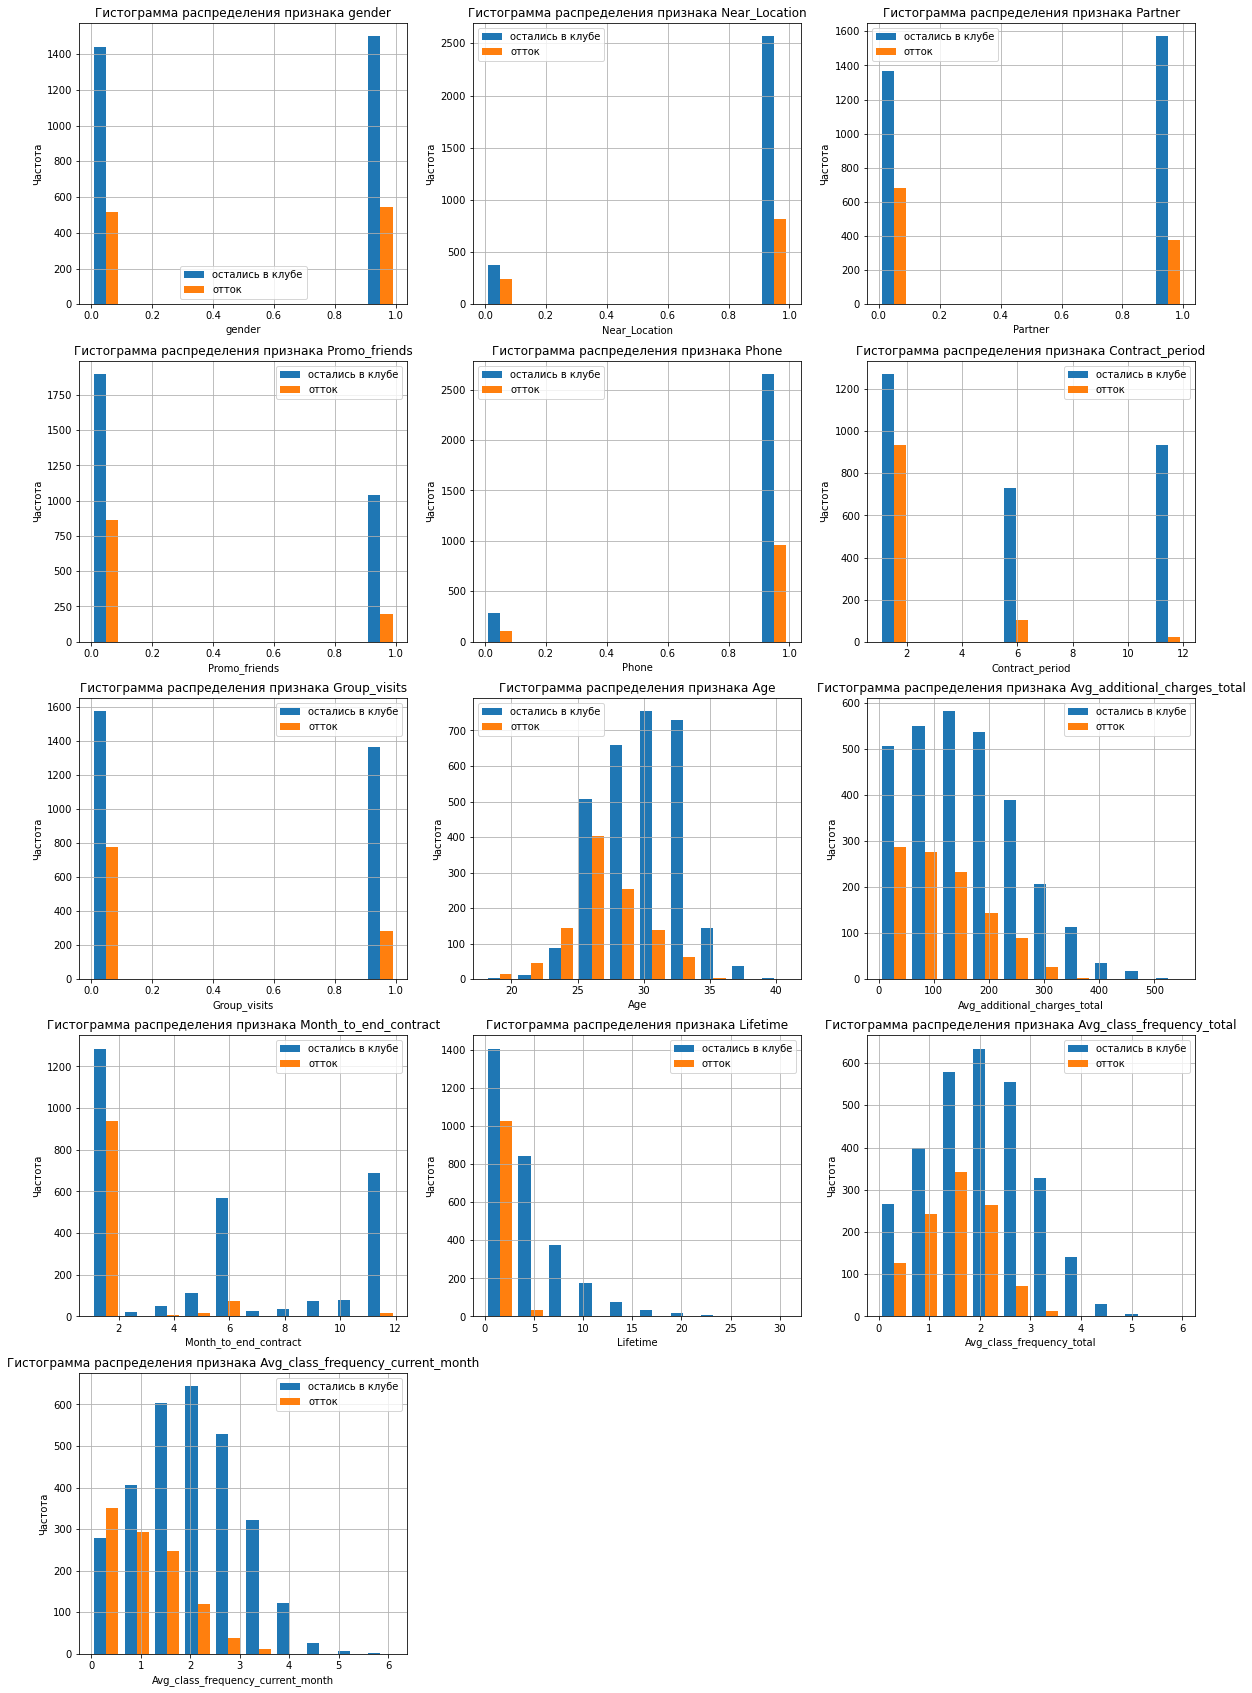

In [6]:
fig = plt.figure(figsize=(20,30))
for i,column in enumerate(data.drop('Churn', axis=1).columns, start=0):
    ax=plt.subplot(5,3,i+1) 
    ax.hist([data.query('Churn == 0')[column], data.query('Churn == 1')[column]], label=['остались в клубе', 'отток'])
    plt.title('Гистограмма распределения признака ' + column)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid()
    plt.legend()
plt.show();

По гистограмме распределения можем сделать следующие выводы:
* В клубе занимается примерно равное количество мужчин и женщин. В отток так же попало равное количество мужчин и женщин;
* Большинство клиентов живут или работают в районе расположения фитнес-центра;
* В клубе немного больше клиентов из компаний-партнёров, чем остальных посетителей, не относящихся к данной категории. А вот клиентов попавших в отток из компаний-партнёров меньше.;
* Так же доля оттока клиентов пришедших по акции "Приведи друга" меньше, чем доля оттока остальных посетителей;
* У большинства клиентов в анкетах указан номер телефона;
* В клубе больше всего клиентов с абонементом на 1 месяц занятий, немного меньше клиентов с абонементом на 12 месяцев и еще меньше - на 6 месяцев. Обращаем внимание, что в отток попала львиная доля посетителей, имеющих абонемент только на 1 месяц обслуживания;
* Немного меньше половины пользователей посещяют групповые занятия. Практически 1/3 клиентов, не посещяющих групповые занятия попала в отток;
* Возраст посетителей клуба от 10 до 40 лет. Больше половины клиентов до 25 лет перестали пользоваться услугами фитнес-центра;
* У большей части клиентов, попавших в отток в ближайший месяц заканчивается срок абонемента;
* Практически все кто попал в отток пользовались услугами фитнес-центра менее 3-х месяцев;
* В оттоке не так много клиентов, кто посещает спортзал более 2 раз в неделю;
* Больше половины клиентов, не посетивших спортзал ни разу за последний месяц попали в отток.

Вычислим корреляционную матрицу.

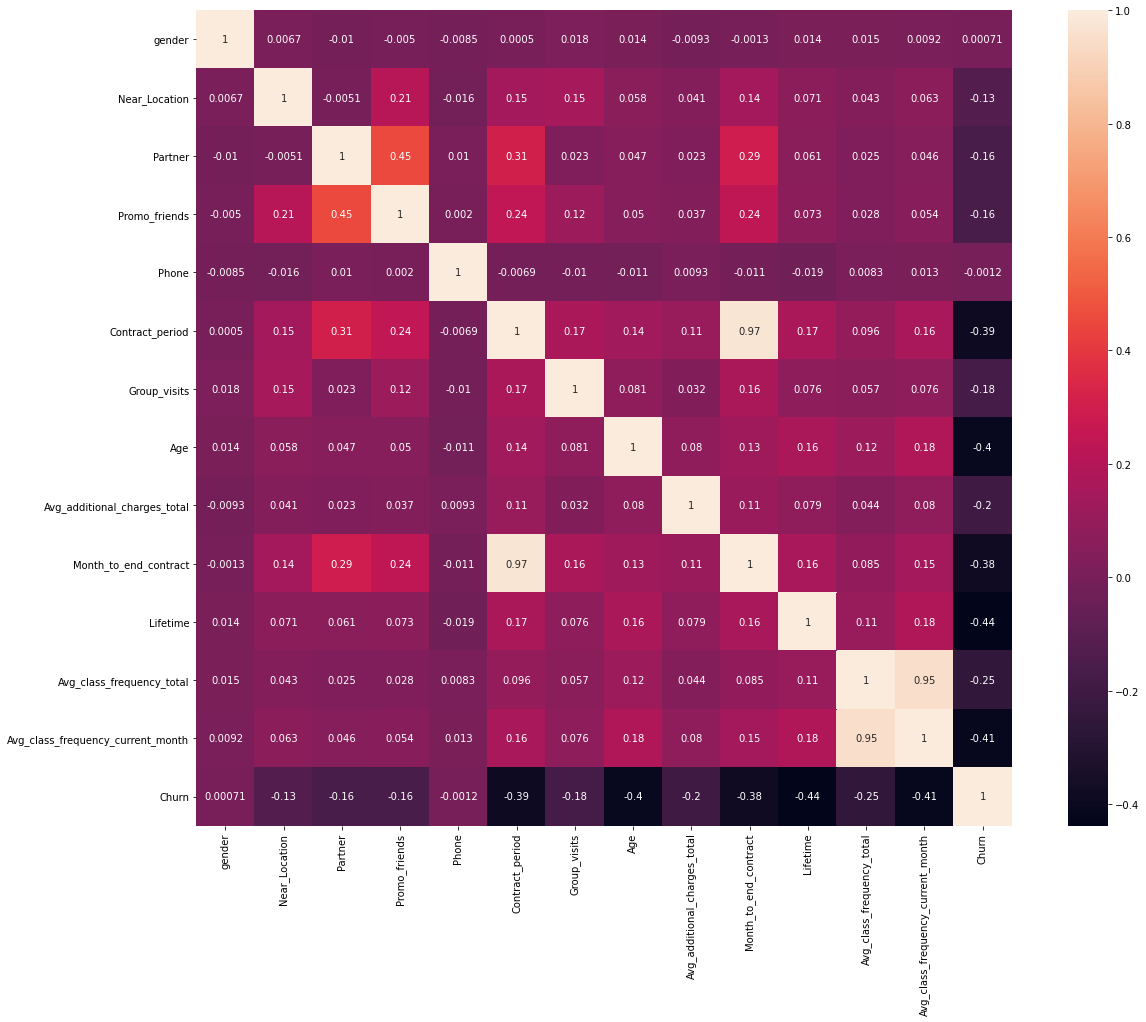

In [7]:
#построим и отрисуем матрицу корреляций
cm = data.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(20,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
plt.show()

Можем заметить, что некоторые признаки сильно коррелируют между собой: 
* срок до окончания текущего действующего абонемента -  длительность текущего действующего абонемента;
* средняя частота посещений в неделю за все время с начала действия абонемента - средняя частота посещений в неделю за предыдущий месяц.

Удалим признаки: срок до окончания текущего действующего абонемента, средняя частота посещений в неделю за предыдущий месяц.

In [8]:
print('Список столбцов:', data.columns)
data = data.drop(columns=['Month_to_end_contract', 'Avg_class_frequency_current_month'])
print('Список столбцов после удаления', data.columns)

Список столбцов: Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
Список столбцов после удаления Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total',
       'Churn'],
      dtype='object')


## Модель прогнозирования оттока клиентов.

Разделим наши данные на признаки(матрица `X`) и целевую переменную(`y`).

In [9]:
X = data.drop('Churn', axis=1)
y =  data['Churn']

Разделим модель на обучаяющую и валидационную выборку.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Стандартизация признаков

In [11]:
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train) # обучим scaler на обучающей выборке методом fit
X_train_st = scaler.transform(X_train) # стандартизируем обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test)# стандартизируем тестовую выборку метbдом transform scaler

### Обучение модели логистической регрессией.

Создадим объект класса `LogisticRegression`.

In [12]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)

Обучим модель на train-выборке логистической регресией и сделаем прогнозы.

In [13]:
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

### Обучение модели случайным лесом.

Создадим объект класса `RandomForestClassifier`. Обучим модель на train-выборке случайным лесом и сделаем прогнозы.

In [14]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 

### Оценка метрик accuracy, precision и recall.

Оценим метрики на валидационной выборке для логистической регрессии.

In [15]:
print('Метрики для логистической регрессии')
print('accuracy:{:.2f}   precision :{:.2f}   recall:{:.2f} '.format(
            accuracy_score(y_test, lr_predictions),
            precision_score (y_test, lr_predictions),
            recall_score (y_test, lr_predictions) 
        )
     )

Метрики для логистической регрессии
accuracy:0.90   precision :0.79   recall:0.81 


Оценим метрики на валидационной выборке для случайного леса.

In [16]:
print('Метрики для случайного леса')
print('accuracy:{:.2f}   precision :{:.2f}   recall:{:.2f} '.format(
            accuracy_score(y_test, rf_predictions),
            precision_score (y_test, rf_predictions),
            recall_score (y_test, rf_predictions) 
        )
     )

Метрики для случайного леса
accuracy:0.89   precision :0.79   recall:0.76 


**Выводы**
1) Доля правильных ответов для логистической регриссии на 1% больше, чем у модели случайного леса;

2) Доля правильных ответов среди среди класса '1', т.е. класса клиентов, попавших в отток, одинака для обеих моделей;

3) Реальных клиентов, попавших в отток, модель логистической регресии смогла обнаружить на 5% больше, чем модель случайного леса.

Нам важно проработать как можно больше клиентов, которые действительно планируют отказаться от услуг фитнес-центра. В нашем случае метрика `recall` является приоритетной, и можно сказать, что модель логистической регрессии показала себя лучше.

## Кластеризация клиентов

Стандартизируем таблицу без колонки со значением оттока.

In [17]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(X) # обучаем нормализатор и преобразуем набор данных

Построим матрицу расстояний  на стандартизованной матрице признаков. 

In [18]:
linked = linkage(X_sc, method = 'ward') 

Визуализируем расстояния между объектами и на специальном графике — дендрограмме.

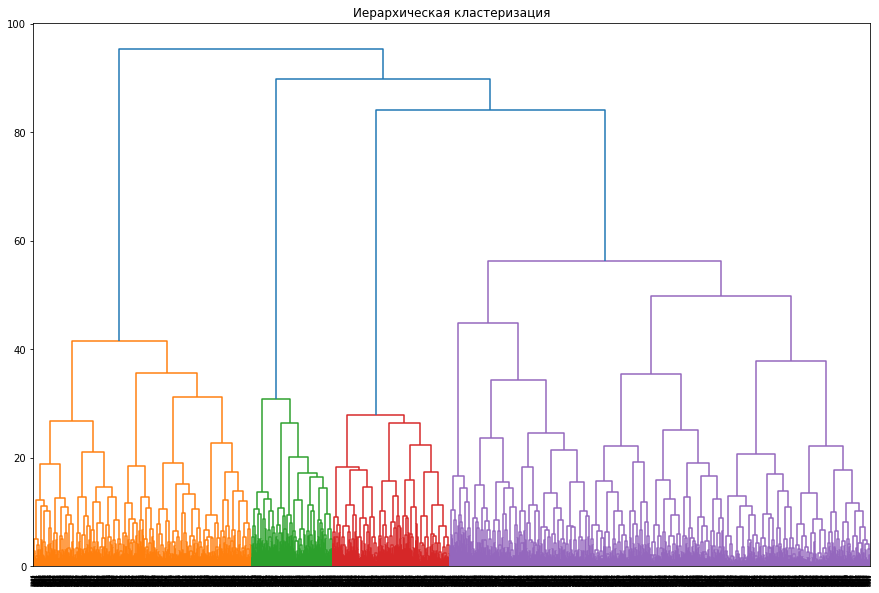

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Образовались связки 4 цветов, но фиолетовая связка достаточно большая, так что возможно этот кластер поделить пополам. В итоге остановимся на 5 кластерах.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [20]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc)

Добавим в исходный датафрейм столбец с номером кластера.

In [21]:
data['clusters'] = labels

Посмотрим на средние значения признаков для кластеров.

In [22]:
data.groupby('clusters').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
clusters,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Посмотрим на кластер 0 с самым высоким риском оттока (около 40%): клиенты клубов живут далеко от фитнес-центров, они редко приходят по акции "приведи друга", они заключают контракт на срок меньше года, редко ходят на групповые программы, у них самая меньшая суммарная выручка от других услуг фитнес-центра, у них самая маленькая средняя частота посещений в неделю за все время с начала действия абонемента.

Посмотрим на кластер с самым низким риском оттока (около 12%): клиенты живут рядом с фитнес-центром, очень часто они являются сотрудниками компании-партнёра клуба, они часто приходят по акции "привед друга", клиенты приобретают абонемент на более длительный срок, достаточно часто посещают групповые занятия, у клиентов данного кластера самая высокая суммарная выручка от других услуг фитнес-центра, они дольше всего остаются в клубе с момента первого обращения в фитнес-центр, у них самая высокая средняя частота посещений в неделю за все время с начала действия абонемента. 

Построим распределения признаков для кластеров. 

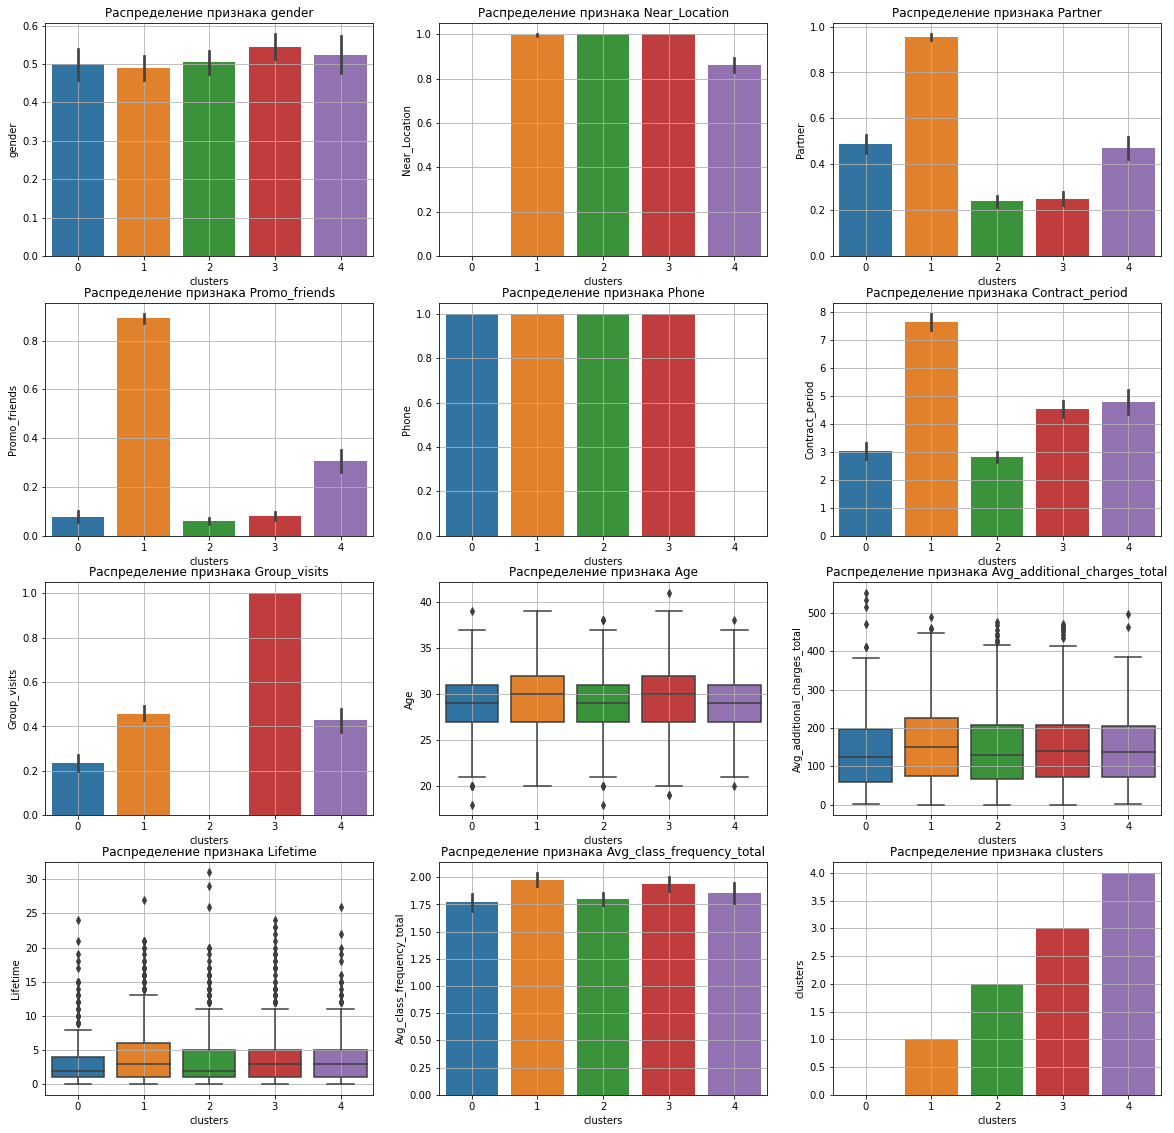

In [23]:
fig = plt.figure(figsize=(20,30))
for i,column in enumerate(data.drop('Churn', axis=1).columns, start=0):
    ax=plt.subplot(6,3,i+1)
    if column in ['Age','Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_current_month']:
        sns.boxplot(data=data, x='clusters', y=column, ax=ax)
    else:
        sns.barplot(data=data,x='clusters', y=column, ax=ax)
    plt.title('Распределение признака ' + column)
    plt.xlabel('clusters')
    plt.ylabel(column)
    plt.grid()
plt.show();

Для каждого полученного кластера посчитаем долю оттока. 

In [24]:
data.groupby('clusters')['Churn'].agg({'mean'})

,mean
clusters,
0,0.399287
1,0.120952
2,0.381625
3,0.200918
4,0.266839


Кластеры 0 и 2 более склонны к оттоку, кластер 1 и 3 являются более надёжными.

## Выводы

Для удержания клиентов рекомендуется взаимодействовать с клиентами кластера, у которого самый высокий риск оттока:
* Мотивировать клиентов ходить на групповые занятия;
* Присылать клиенту напоминание о клубе, если он появлялся там больше недели назад;
* Предлагать акции/скидки на продление на абонементы с большей длительностью за пару недель до окончания абонемента;
* Предлагать клиентам дополнительные услуги фитнес-центра: кафе, спорттовары, косметический и массажный салон.

Так же необходимо работать на привлечение клиентов, живущих рядом с фитнес-центром, расширять список компаний-партнёров и мотивировать действующих клиентов приводить в клуб знакомых по акции "приведи друга".